In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import probplot
from sklearn.linear_model import LinearRegression    #### skikit learn website
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.style.use('ggplot')
response = 'Usage_kwh'

https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c

## Load the Data

In [92]:
df=pd.read_csv("/Users/user/Documents/M.Tech Data Science-BITS Pilani/Second Semester/Machine Learning/Assignment/Steel_industry_data.csv")
#df = pd.DataFrame(data=df)

In [47]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [48]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [49]:
df.info() ## There is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [50]:
df.duplicated().sum()    ## There is no duplicate data

0

## Adding Col 'Shift' to label the data for Day and Night time

In [93]:
df["Shift"]=df['date'].apply(lambda x : "Day" if pd.to_datetime(str(x)).time().hour >=7 and pd.to_datetime(str(x)).time().hour < 19 else "Night" )
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Shift
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,Night
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,Night
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,Night
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,Night
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,Night


## Finding Outlier if any 

In [52]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'Shift'],
      dtype='object')

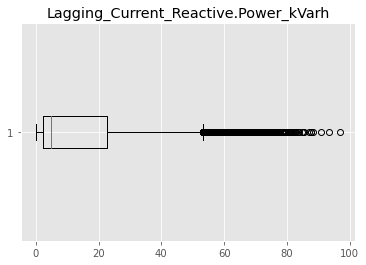

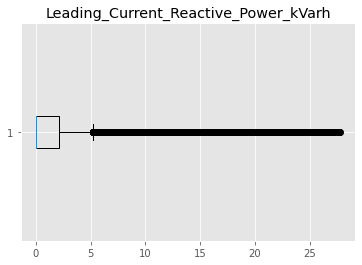

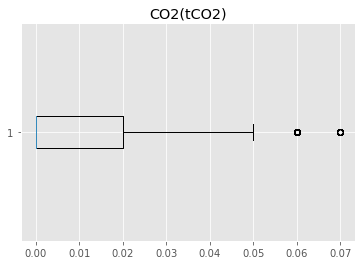

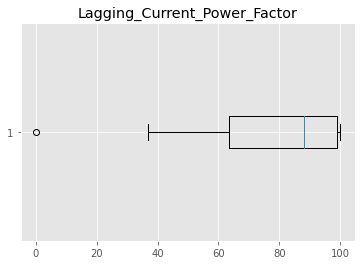

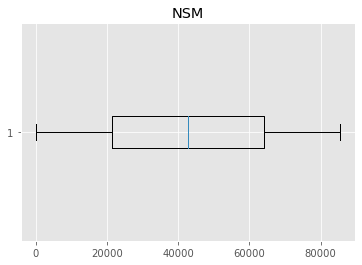

In [94]:
#sns.boxplot(x=df['Shift'],y=df['Usage_kWh'])


plt.boxplot(x=df['Lagging_Current_Reactive.Power_kVarh'],vert=False)
plt.title('Lagging_Current_Reactive.Power_kVarh')
plt.show()

plt.boxplot(x=df['Leading_Current_Reactive_Power_kVarh'],vert=False)
plt.title('Leading_Current_Reactive_Power_kVarh')
plt.show()

plt.boxplot(x=df['CO2(tCO2)'],vert=False)
plt.title('CO2(tCO2)')
plt.show()

plt.boxplot(x=df['Lagging_Current_Power_Factor'],vert=False)
plt.title('Lagging_Current_Power_Factor')
plt.show()

plt.boxplot(x=df['NSM'],vert=False)
plt.title('NSM')
plt.show()


In [95]:
## Number of rows before outlier removal
r1=len(df)
r1

35040

In [96]:
df=df[df['Lagging_Current_Reactive.Power_kVarh']<=47]
df=df[df['Leading_Current_Reactive_Power_kVarh']<=0.1]
df=df[df['CO2(tCO2)']<0.055]
df=df[df['Lagging_Current_Power_Factor']>0]



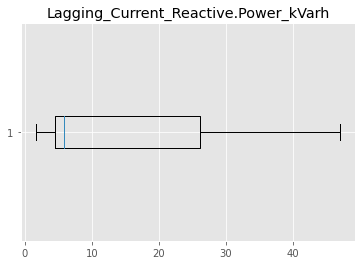

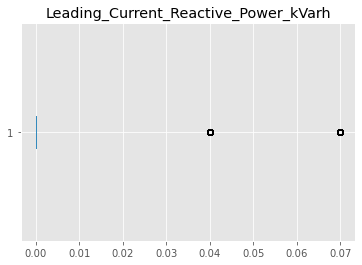

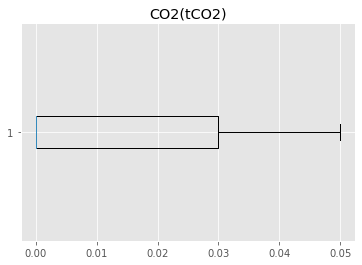

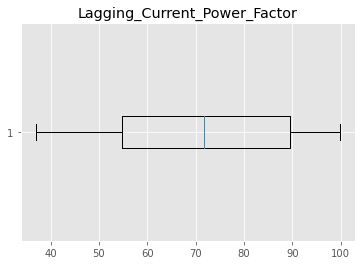

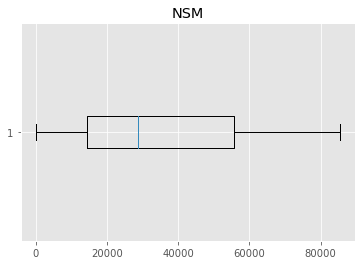

In [97]:
plt.boxplot(x=new_df['Lagging_Current_Reactive.Power_kVarh'],vert=False)
plt.title('Lagging_Current_Reactive.Power_kVarh')
plt.show()

plt.boxplot(x=new_df['Leading_Current_Reactive_Power_kVarh'],vert=False)
plt.title('Leading_Current_Reactive_Power_kVarh')
plt.show()

plt.boxplot(x=new_df['CO2(tCO2)'],vert=False)
plt.title('CO2(tCO2)')
plt.show()

plt.boxplot(x=new_df['Lagging_Current_Power_Factor'],vert=False)
plt.title('Lagging_Current_Power_Factor')
plt.show()

plt.boxplot(x=new_df['NSM'],vert=False)
plt.title('NSM')
plt.show()

In [98]:
##number of rows after outlier removal
r2=len(df)
r2

22268

## Data loss because of outlier reduction

In [99]:
((r1-r2)/r1)*100 # we lost 22% data for outlier removal

36.449771689497716

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.hist(df['Day_of_week'],bins=None,  histtype='line', align='mid', orientation='vertical', width=0.3, color='b')

plt.show()    ## Usage on weeks 

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['Usage_kWh'], 'o', label='original data')
#plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

## Droping Date and Usage column 


In [100]:
target_var=df['Usage_kWh']

In [101]:
df.drop(['date','Usage_kWh'],axis=1,inplace=True)

## Converting Categorical variables to Dummy Variables

In [102]:
cat_variables=['WeekStatus', 'Day_of_week', 'Load_Type','Shift']

In [103]:
df = pd.get_dummies(df, columns=['WeekStatus', 'Day_of_week', 'Load_Type','Shift'],drop_first=True)
df.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load,Shift_Night
0,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0,1
1,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0,1
2,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0,1
3,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0,1
4,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0,1


## split the dataset into train set and test test
## train set will be used for training the actual model (70% of the original data)
## test set will be used for evaluating the model which was build on the train set (30% of the original data)

In [104]:
# Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df, target_var, test_size = 0.30, random_state = 1006)

In [105]:
X_train.shape

(15587, 16)

In [106]:
# Linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [107]:
lin_reg.coef_[0]
lin_reg.intercept_

-6326.98816027483

In [108]:
# Intercept and co-efficients
pd.DataFrame({"Features": ["Intercept"] + X_train.columns.tolist(), 
              "Parameter Estimates": [lin_reg.intercept_.tolist()] + lin_reg.coef_.tolist()})

,Features,Parameter Estimates
0,Intercept,-6326.988160
1,Lagging_Current_Reactive.Power_kVarh,0.226534
2,Leading_Current_Reactive_Power_kVarh,-0.369151
3,CO2(tCO2),1736.330993
4,Lagging_Current_Power_Factor,0.097047
5,Leading_Current_Power_Factor,63.233662
6,NSM,-0.000003
7,WeekStatus_Weekend,-0.057415
8,Day_of_week_Monday,-0.067028
9,Day_of_week_Saturday,-0.062257


In [109]:
# R-squared - Percentage of variance in response explained by model
lin_reg.score(X_train, y_train)

0.9819417531044963

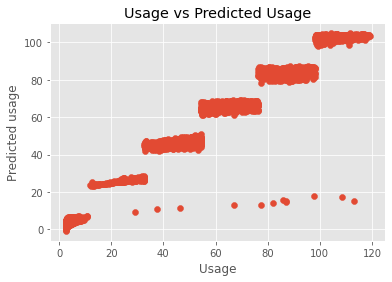

In [110]:
# Residuals or training error 
fitted_values = lin_reg.predict(X_train)

plt.scatter(y_train, fitted_values)
plt.xlabel("Usage")
plt.ylabel("Predicted usage")
plt.title("Usage vs Predicted Usage")
plt.show()

In [111]:
# Computing residuals
error_df = pd.DataFrame({"Observed_MEDV": y_train, "Predicted_MEDV": fitted_values})
error_df["Residuals"] = error_df.Observed_MEDV - error_df.Predicted_MEDV
error_df

,Observed_MEDV,Predicted_MEDV,Residuals
24036,33.08,44.056439,-10.976439
29769,2.95,2.774438,0.175562
11329,2.59,3.107465,-0.517465
27270,3.56,2.793354,0.766646
2764,89.82,84.909792,4.910208
...,...,...,...
5047,110.48,102.878213,7.601787
10087,3.10,3.452397,-0.352397
23448,2.56,2.290841,0.269159
30105,52.52,47.169314,5.350686


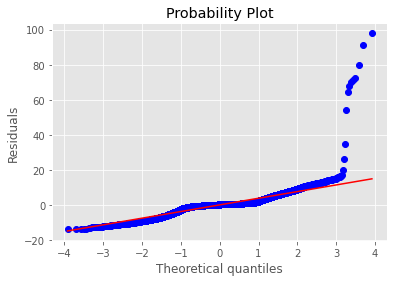

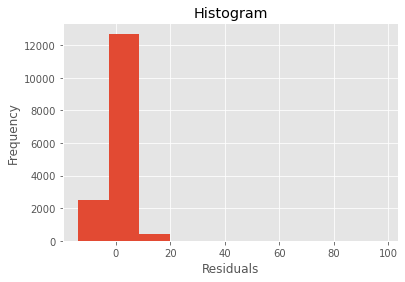

In [112]:
# Normality of residuals
residuals = y_train - fitted_values

# Probability plot for residuals 
probplot(residuals, plot=plt)
plt.ylabel("Residuals")
plt.show()

# histogram for residuals
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

Text(0.5, 1.0, 'Prices vs Predicted usage')

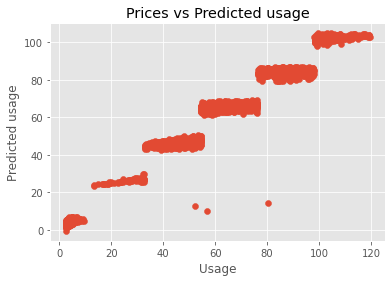

In [113]:
# Evaluating the model
y_pred = lin_reg.predict(X_test) # prediction errors

plt.scatter(y_test, y_pred) 
plt.xlabel("Usage")
plt.ylabel("Predicted usage")
plt.title("Prices vs Predicted usage")

In [114]:
# Computing prediction errors
error_df = pd.DataFrame({"Observed_MEDV": y_test, "Predicted_MEDV": y_pred})
error_df["Prediction_errors"] = error_df.Observed_MEDV - error_df.Predicted_MEDV
error_df

,Observed_MEDV,Predicted_MEDV,Prediction_errors
17964,3.13,2.298040,0.831960
1795,105.16,103.100581,2.059419
16325,3.64,2.752736,0.887264
14713,2.95,1.914853,1.035147
27791,53.17,49.404313,3.765687
...,...,...,...
15803,56.70,64.305649,-7.605649
29729,55.58,66.617016,-11.037016
2409,30.49,26.904469,3.585531
29822,56.92,65.310696,-8.390696


In [115]:
# Evaluation metrics - MSE (Mean squared errors)
mse = mean_squared_error(y_test, y_pred)
print(mse)

15.797822324805788


15.79782232480577

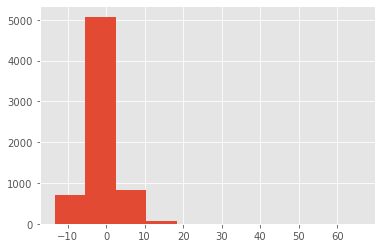

In [116]:
# Computing MSE manually
error_df.Prediction_errors.hist() # histogram for the prediction errors
error_df["Squared_Error"] = error_df.Prediction_errors ** 2
error_df.Squared_Error.mean()

## MAE - Mean absolute error
## RMSE - Root mean squared error

In [117]:
# Regression Coefficients 
no_of_bootstraps = 1000
len_train = len(y_train)
subsample_size = np.int(0.5*len_train)
subsample = lambda: np.random.choice(np.arange(0, len_train), size=subsample_size)
coefs = np.ones(no_of_bootstraps) #pre-allocate the space for the coefs

for i in range(no_of_bootstraps):
    subsample_idx = subsample()
    subsample_X = X_train.iloc[subsample_idx]
    subsample_y = y_train[subsample_idx]
    lin_reg.fit(subsample_X, subsample_y)
    coefs[i] = lin_reg.coef_[0]
    
plt.hist(coefs, bins=50)
plt.title("Histogram of the lr.coef_[0].")

print("Confidence interval for lr.coef_[0]: ", np.percentile(coefs, [2.5, 97.5]))

/var/folders/t1/_3bl6tmj0859jt3t69_8r9d80000gn/T/ipykernel_1772/2381270201.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  subsample_size = np.int(0.5*len_train)


KeyError: '[14696, 14199, 8287, 6545, 10693, 1293, 13886, 8917, 282, 10743, 1498, 8006, 8337, 9769, 3415, 3496, 9456, 14518, 15518, 2201, 11112, 13515, 9537, 12136, 1716, 1031, 10180, 13667, 1972, 1862, 7671, 2367, 1774, 1694, 8119, 12065, 5934, 2651, 5368, 568, 8041, 13760, 2454, 7216, 9380, 4670, 3431, 13017, 7940, 4585, 12857, 1523, 4493, 11383, 4356, 2096, 6988, 11754, 7484, 251, 3085, 8970, 11474, 14748, 12285, 12906, 9387, 12852, 7761, 8726, 14898, 7943, 8592, 11024, 14978, 1762, 6515, 724, 5733, 5884, 15360, 8853, 8760, 2523, 5074, 8832, 13018, 10705, 7787, 6027, 12497, 1141, 14318, 15349, 9308, 7825, 14684, 11944, 1821, 11590, 7931, 7516, 12039, 10624, 8079, 4162, 6954, 5232, 14095, 6555, 8192, 13626, 1324, 6474, 15344, 8824, 12010, 10031, 10353, 9099, 4023, 14182, 14354, 3872, 15050, 9929, 1128, 14113, 10259, 6695, 8154, 6902, 3911, 1703, 9424, 1331, 2678, 11899, 12292, 9729, 827, 14056, 4487, 11169, 15315, 3781, 4645, 2698, 10803, 8587, 12959, 7285, 4643, 15219, 1631, 7184, 13906, 10992, 12710, 11512, 6312, 10610, 12972, 1134, 13106, 13699, 12630, 6423, 3982, 2624, 10632, 6314, 7279, 6260, 11055, 3552, 5702, 12024, 13134, 1777, 551, 5491, 15159, 3827, 5987, 1977, 8499, 343, 15448, 6769, 764, 9230, 2644, 4848, 9252, 11980, 448, 3310, 374, 12093, 3343, 3944, 1027, 15057, 12913, 11208, 2445, 264, 726, 563, 13812, 14574, 12810, 1699, 13995, 917, 10351, 9376, 11327, 9992, 3491, 4369, 10597, 7813, 8952, 9963, 11293, 4572, 9675, 13593, 12051, 6635, 15304, 760, 7423, 13139, 10602, 13691, 3048, 6024, 8200, 6315, 6904, 7375, 10454, 4117, 15277, 7354, 8606, 5761, 1101, 3035, 3822, 14579, 15439, 6969, 5261, 13522, 1681, 15431, 10599, 4294, 12907, 14545, 11091, 11176, 322, 10550, 7566, 5038, 14475, 232, 763, 7870, 13412, 193, 5267, 4779, 9206, 4212, 9355, 1710, 4503, 14868, 3623, 13390, 7428, 13800, 5057, 7262, 5529, 13610, 1406, 5170, 1385, 12977, 148, 10513, 5343, 13776, 9834, 1378, 531, 269, 4204, 10165, 2216, 12717, 13904, 2291, 2534, 15558, 2634, 10899, 3801, 4597, 15144, 4083, 10443, 6986, 99, 4202, 4669, 13111, 2660, 12628, 9902, 7213, 13505, 5447, 5953, 14530, 11651, 12867, 5557, 5467, 3304, 12227, 3946, 8046, 14718, 15351, 11305, 470, 14848, 9740, 9131, 3577, 8668, 11973, 5311, 14102, 9096, 4892, 714, 10481, 2129, 8604, 6182, 11760, 13013, 1994, 7606, 1693, 11757, 8677, 11494, 6688, 7714, 6514, 11216, 2198, 1195, 5639, 3978, 8550, 277, 13510, 1883, 7605, 14592, 13415, 6636, 8962, 15585, 14721, 14894, 5636, 9685, 11633, 707, 8483, 553, 8392, 8628, 13422, 8193, 6529, 13911, 13225, 5239, 10093, 5410, 4799, 72, 13029, 11108, 3697, 8437, 2621, 4663, 13008, 11890, 10453, 9603, 1913, 11577, 5138, 4324, 5069, 6890, 10130, 13405, 3091, 8620, 14349, 13006, 5428, 8035, 1966, 7821, 4683, 10737, 4292, 10050, 3151, 4835, 14280, 3540, 8326, 7748, 12916, 10830, 14433, 2099, 2567, 11913, 3604, 2866, 13948, 1985, 7665, 13413, 9258, 517, 10516, 1616, 11404, 5978, 11287, 6091, 9119, 3439, 6259, 15266, 8975, 15337, 8588, 1761, 3883, 6081, 4218, 930, 2754, 4989, 12552, 4535, 1982, 12183, 1540, 12141, 12643, 8966, 9397, 5897, 1859, 3236, 948, 5440, 9772, 6431, 12115, 3492, 5630, 11220, 8301, 9054, 5037, 13039, 14186, 6586, 1045, 3821, 12898, 9574, 4015, 13666, 13380, 4203, 4569, 260, 9672, 7693, 530, 6645, 10036, 4725, 2531, 13681, 1876, 11236, 5042, 6611, 1174, 5084, 3694, 13217, 10442, 9636, 12433, 13402, 434, 4573, 4566, 5638, 2090, 9370, 14921, 15446, 3298, 7431, 12012, 9103, 6685, 14635, 11386, 3448, 13680, 1236, 6559, 1142, 4686, 4450, 10172, 15343, 5198, 13972, 13088, 10028, 7109, 4498, 3740, 8349, 6038, 6662, 10703, 2352, 6983, 14638, 12782, 451, 1227, 4949, 462, 3530, 5369, 10668, 3345, 10562, 4787, 1988, 4546, 6291, 214, 14469, 3661, 5295, 2692, 14870, 11784, 9654, 11592, 1600, 6669, 9094, 31, 13558, 10663, 11029, 11599, 7034, 10934, 9290, 13316, 8562, 1959, 4301, 13684, 8265, 15287, 1505, 6108, 12888, 4691, 12216, 1335, 728, 11662, 6134, 3754, 3272, 101, 3891, 14159, 4014, 4738, 1148, 12633, 4445, 3325, 6488, 5699, 964, 9061, 9408, 2757, 12471, 5739, 4431, 8624, 14955, 933, 11964, 429, 10451, 9976, 9858, 4465, 13014, 12740, 8770, 9283, 11127, 13609, 4595, 5048, 12790, 12120, 3348, 9775, 11650, 1333, 7464, 6070, 9023, 181, 3301, 1975, 5281, 7599, 12637, 12084, 6268, 11288, 3263, 13042, 13719, 15029, 10983, 7463, 3300, 5641, 361, 10098, 1991, 4238, 6666, 12617, 11744, 87, 13595, 8691, 14340, 433, 7609, 357, 6395, 7656, 4458, 8646, 13326, 3595, 13565, 2744, 2335, 15047, 3698, 2696, 11303, 5172, 370, 6132, 635, 695, 1496, 14693, 4239, 3359, 3209, 4687, 2648, 14747, 5644, 8014, 6984, 14560, 14004, 2042, 8687, 11805, 5324, 1365, 1834, 6401, 8029, 4381, 6957, 8116, 3331, 2826, 7337, 7560, 8995, 9844, 13958, 3145, 11376, 2780, 13334, 4342, 7367, 9351, 14942, 3615, 3507, 13242, 6990, 15513, 1204, 819, 12198, 12738, 13743, 3870, 5931, 183, 8049, 1379, 6380, 14927, 6343, 11831, 14077, 7556, 1981, 12520, 11388, 14291, 2548, 3269, 4424, 3990, 12182, 6987, 14818, 12034, 2103, 13335, 7619, 14627, 4275, 11608, 9183, 13989, 4388, 9555, 7890, 15053, 12265, 744, 7479, 2991, 4118, 655, 3202, 7249, 242, 10064, 5840, 7220, 1280, 6180, 4355, 4860, 5264, 12817, 266, 11499, 2067, 14836, 13898, 5809, 12148, 869, 540, 9249, 14614, 7603, 817, 4727, 5240, 14880, 14425, 4235, 6092, 3062, 9134, 1633, 12375, 159, 11988, 14616, 8224, 10691, 9364, 7309, 15166, 12723, 772, 7477, 7770, 8552, 14973, 12918, 14072, 13640, 525, 13687, 6894, 7352, 11841, 6851, 4107, 14736, 7402, 1996, 8151, 6579, 1895, 8713, 8129, 6422, 8106, 9496, 11482, 1621, 11541, 321, 10027, 8697, 12456, 2835, 7031, 13869, 9948, 12312, 13887, 8114, 14, 545, 13103, 5161, 11531, 559, 1022, 6224, 7483, 8796, 4175, 8243, 8013, 9301, 11681, 10826, 14885, 3564, 9689, 13782, 10697, 9358, 11393, 3960, 15398, 7589, 8308, 8306, 14578, 1610, 1628, 9706, 478, 13926, 10209, 4345, 1454, 2679, 14087, 945, 1889, 9222, 11377, 10786, 11244, 12341, 11954, 6189, 4400, 8979, 15317, 14603, 10044, 5912, 13028, 10102, 11819, 12204, 1872, 10470, 133, 6712, 10100, 7460, 4467, 15512, 4471, 3563, 13023, 15333, 1992, 4087, 14642, 10652, 13722, 11601, 6580, 1832, 5220, 3792, 6539, 13871, 13429, 10547, 2086, 7910, 4711, 1018, 14547, 9670, 2328, 6373, 11020, 13452, 5745, 4438, 5079, 14064, 1102, 2565, 15314, 11921, 1725, 12550, 12722, 13518, 8712, 5606, 3989, 15301, 14765, 1233, 8293, 9391, 591, 2284, 13279, 11158, 8351, 8130, 4769, 10022, 8047, 4489, 9487, 7041, 1186, 3334, 9561, 4174, 11667, 9943, 10111, 12615, 14656, 15013, 13524, 9946, 8530, 13406, 11279, 8607, 5703, 13624, 14477, 15326, 51, 9751, 10528, 4178, 12572, 6289, 665, 13607, 4959, 13912, 2272, 14040, 4703, 9442, 13093, 4694, 8074, 9957, 468, 13772, 10536, 12003, 3406, 746, 6035, 3840, 11261, 9073, 1430, 276, 5705, 3350, 14529, 8613, 10340, 13347, 11062, 5063, 13238, 1962, 11470, 5355, 13113, 2943, 12680, 15334, 6002, 14851, 6453, 898, 14460, 4902, 4843, 8422, 8012, 4495, 4161, 11161, 909, 4774, 1238, 10736, 10962, 7636, 5709, 8707, 9287, 9961, 2296, 4816, 5448, 4054, 1840, 15046, 2310, 7281, 12366, 5956, 3447, 15421, 1745, 15306, 13122, 6865, 13236, 7590, 6481, 950, 6137, 14883, 7251, 454, 9962, 14786, 10223, 1048, 12924, 7211, 2487, 2758, 14420, 3009, 10920, 6195, 15469, 11089, 7373, 1289, 10251, 2054, 10527, 6704, 4484, 4517, 14929, 12523, 10069, 1778, 12056, 8579, 8674, 12566, 2428, 14611, 6274, 11509, 1181, 7744, 6183, 15176, 1841, 15071, 6003, 14161, 15309, 12697, 12383, 12772, 14061, 12592, 1801, 1993, 6792, 6802, 9678, 3824, 13403, 6535, 5341, 494, 8919, 11989, 9345, 14092, 12612, 14711, 3882, 7768, 5316, 2571, 15358, 12240, 11573, 5842, 1038, 7569, 4677, 940, 8845, 1336, 557, 854, 3120, 9502, 12807, 5224, 3160, 651, 13682, 319, 3981, 7957, 12402, 4378, 12641, 5620, 9143, 10128, 12358, 5635, 14104, 12044, 6115, 7155, 12052, 9939, 910, 3918, 3024, 6186, 4681, 2892, 14561, 7522, 9941, 4113, 6806, 4559, 0, 8263, 39, 5936, 410, 995, 9306, 14281, 3399, 15318, 9611, 7350, 9289, 4778, 2763, 1392, 2925, 14238, 173, 8309, 10887, 3205, 10424, 11829, 2022, 3506, 4796, 6151, 11201, 13105, 11113, 11950, 11961, 8643, 3123, 13359, 278, 8494, 10618, 11566, 9971, 5714, 3904, 111, 9300, 4826, 11082, 12158, 10024, 2246, 4459, 11642, 14643, 6590, 7332, 10415, 1395, 12048, 5618, 15420, 8520, 1709, 6762, 14752, 15372, 9367, 456, 4913, 13874, 3337, 9861, 544, 135, 8599, 11384, 5829, 12658, 2049, 15226, 9012, 6041, 14605, 13579, 13396, 8603, 4476, 1237, 4257, 10722, 5460, 1397, 70, 6082, 9374, 12739, 13713, 2884, 7941, 5022, 8629, 15243, 3326, 1999, 13875, 14389, 13050, 10636, 15203, 5512, 9633, 6344, 11369, 5087, 9279, 2196, 13591, 5462, 11528, 10717, 15525, 10186, 1270, 3366, 2224, 12920, 6660, 11596, 9883, 8009, 4583, 3052, 4368, 13920, 11205, 3158, 10577, 1654, 10627, 13632, 13382, 1955, 10113, 8500, 12921, 2128, 15410, 7860, 14953, 143, 7827, 403, 11028, 12382, 3195, 2084, 4066, 15413, 14234, 11495, 14083, 11145, 1130, 12236, 5141, 8304, 3889, 14145, 12636, 5200, 1864, 8900, 4992, 12537, 3603, 14743, 12178, 11124, 1504, 8715, 5834, 7504, 7539, 1203, 15302, 9203, 3765, 1970, 8495, 4578, 13864, 8284, 7427, 12445, 1291, 5238, 14602, 8667, 11177, 4589, 1414, 2007, 8366, 3247, 3505, 7955, 13126, 11362, 12280, 13329, 11476, 11676, 9361, 4391, 4098, 7565, 15133, 5925, 1112, 10719, 6698, 10118, 13471, 4080, 14991, 4180, 12318, 11571, 5305, 7079, 8294, 13321, 2856, 147, 4980, 4720, 7168, 11741, 5539, 5398, 4499, 5806, 7280, 704, 10318, 14620, 7226, 6602, 6484, 1235, 3099, 15068, 4656, 15124, 11054, 4926, 3759, 8439, 5094, 14674, 8915, 9578, 13986, 2068, 4983, 3308, 12733, 11334, 8892, 14062, 5736, 4286, 11588, 15183, 13305, 13893, 15438, 8299, 4005, 2761, 7114, 7981, 12086, 3221, 6378, 8738, 1030, 6328, 4303, 5510, 184, 1952, 1314, 5326, 4557, 10559, 6231, 942, 11126, 2203, 3229, 226, 9652, 2371, 7863, 10712, 13693, 840, 13692, 1305, 2723, 2533, 6856, 10820, 3638, 3394, 11759, 7403, 5318, 4658, 14053, 9299, 10234, 11254, 9869, 12142, 12814, 3295, 5728, 15331, 1916, 8566, 10252, 15387, 8288, 5544, 6406, 10040, 1269, 9736, 3445, 1490, 11073, 1861, 10718, 11421, 4413, 1747, 7154, 11886, 15298, 210, 11365, 6178, 6681, 8783, 11965, 4486, 7757, 12426, 449, 7729, 12574, 3412, 3002, 6531, 155, 15489, 10641, 4944, 7618, 4729, 14664, 15313, 11506, 12645, 7057, 6672, 2902, 7475, 14756, 9875, 7875, 13053, 8974, 14294, 3945, 5139, 12764, 10591, 11563, 5810, 12966, 7785, 6664, 15251, 6574, 12853, 4520, 6842, 14909, 4366, 4318, 10816, 12095, 464, 5904, 9362, 1702, 6589, 10708, 1849, 13783, 4456, 11221, 3797, 14411, 5176, 3971, 13385, 12454, 15424, 9975, 201, 654, 1606, 8608, 12752, 5062, 8735, 7016, 14167, 2061, 6144, 8026, 6098, 7001, 2237, 3784, 14443, 9766, 5889, 13312, 883, 14079, 12688, 970, 7923, 1928, 6084, 15260, 5656, 3317, 2673, 8614, 4464, 9866, 14442, 1860, 4930, 558, 13608, 7918, 12651, 6994, 12661, 13041, 4568, 12180, 9732, 7651, 7227, 7593, 12336, 5424, 2616, 10839, 13967, 15255, 9437, 11194, 14654, 10397, 10226, 8595, 3294, 5990, 519, 12619, 457, 9852, 8010, 14315, 14059, 13431, 9641, 9194, 13644, 4850, 5344, 1564, 9575, 6517, 2350, 15457, 1071, 274, 4985, 2500, 4196, 4270, 10406, 14570, 8229, 5878, 1990, 8524, 8135, 4308, 418, 12880, 8090, 9801, 10164, 11414, 14583, 2288, 9773, 9280, 13949, 6169, 10667, 13992, 13389, 11967, 5241, 3223, 12634, 3928, 9753, 9535, 4338, 5524, 14771, 13673, 9273, 4490, 5596, 332, 4587, 11645, 1285, 371, 12130, 4077, 3991, 3071, 3329, 9781, 3814, 4570, 10317, 8186, 14698, 3574, 7061, 11374, 9207, 1009, 1318, 15060, 2924, 8534, 8053, 11289, 3302, 10114, 3242, 12468, 11270, 8655, 11553, 13586, 6000, 3437, 7150, 12712, 2294, 4147, 3531, 6419, 7682, 10874, 4444, 8575, 8389, 13724, 6570, 6838, 12616, 11878, 831, 8596, 10832, 15132, 4867, 7055, 717, 1963, 7152, 8935, 5373, 15391, 10167, 7372, 3121, 14812, 815, 6936, 13873, 5991, 5439, 9159, 2760, 10363, 10809, 11977, 7143, 5438, 8460, 54, 5677, 3031, 3897, 9309, 3018, 3352, 2747, 5126, 7843, 14342, 10879, 1717, 1234, 13128, 802, 8693, 5560, 445, 10307, 11480, 711, 539, 12076, 4852, 2746, 11290, 10694, 9591, 7975, 175, 2539, 14535, 4016, 4176, 3081, 3848, 4494, 11837, 4789, 1906, 14584, 13266, 14757, 4091, 405, 4128, 5707, 5331, 12226, 13400, 1912, 14741, 3256, 4827, 7254, 4277, 4962, 14761, 11457, 4479, 5748, 11702, 3157, 14430, 997, 8844, 2543, 1197, 3135, 2320, 3217, 15043, 1488, 939, 2162, 1499, 1976, 4870, 158, 1257, 13520, 11284, 11074, 2871, 14631, 2065, 537, 6133, 12338, 5128, 13258, 5039, 4844, 15428, 6377, 6409, 14742, 9399, 3987, 5600, 8920, 5211, 5003, 12833, 10872, 7700, 8128, 81, 15433, 2066, 13707, 5994, 4928, 9163, 8121, 61, 12477, 4024, 13903, 6753, 4756, 2665, 8695, 10974, 11999, 6687, 5631, 12011, 11955, 2057, 12342, 82, 4462, 4398, 13675, 2268, 8115, 7448, 7081, 2604, 11836, 7030, 2355, 1817, 9331, 11514, 4920, 3335, 4754, 5940, 2389, 7415, 6540, 10729, 3404, 9951, 2572, 4247, 7239, 7558, 11918, 4100, 11294, 14471, 549, 13769, 9945, 4370, 15307, 11409, 3117, 10109, 4590, 752, 5104, 6709, 4555, 1427, 15328, 3679, 8911, 590, 1904, 3005, 5796, 7188, 5118, 14926, 10324, 15401, 856, 7349, 870, 1676, 1935, 1299, 13830, 6790, 3279, 11296, 157, 3787, 748, 10066, 1202, 3313, 548, 6100, 398, 4547, 564, 3156, 2504, 9381, 10593, 5044, 6410, 13613, 13811, 6621, 985, 13985, 10181, 1749, 5187, 9154, 14580, 1707, 4421, 13814, 14763, 3876, 11594, 12819, 14936, 8698, 10634, 2575, 8253, 11391, 7032, 518, 8466, 10455, 13118, 1243, 11771, 13410, 5820, 12678, 15455, 4468, 3240, 1232, 3012, 11603, 1847, 8395, 5363, 8918, 4651, 8329, 14780, 962, 11411, 11267, 3150, 12209, 10110, 14352, 8622, 9722, 611, 330, 11483, 12321, 759, 10845, 6575, 8676, 2736, 9480, 14869, 3919, 709, 4899, 13384, 6499, 2418, 1647, 8806, 14760, 4249, 3208, 1645, 2643, 14653, 9691, 6752, 5645, 13594, 8295, 6934, 12965, 10003, 6065, 7672, 9479, 12725, 13648, 14093, 541, 2144, 3571, 5926, 10727, 8269, 15327, 7932, 3454, 9226, 4279, 13639, 9856, 4649, 11122, 14948, 10132, 720, 14939, 12727, 3538, 14392, 10761, 3858, 3594, 13990, 4461, 567, 10714, 5927, 8098, 10645, 1655, 5826, 3914, 9025, 7820, 176, 12373, 3980, 77, 11125, 12653, 7883, 4551, 10450, 5408, 8051, 8728, 2130, 7368, 12602, 11783, 3155, 12832, 14967, 13799, 8310, 12525, 1590, 1439, 15303, 11117, 10152, 6807, 6999, 12669, 11274, 1190, 9629, 12092, 7430, 8244, 9877, 14310, 5520, 5552, 4755, 5387, 842, 7764, 15402, 8454, 10785, 7664, 1306, 9771, 13643, 11632, 15584, 10379, 48, 9649, 11084, 14739, 3630, 2391, 13401, 376, 6510, 7440, 14057, 11574, 14215, 8631, 2762, 8601, 13981, 3139, 5928, 3923, 5329, 8276, 2258, 11215, 4297, 14675, 6384, 8788, 749, 13351, 5346, 11364, 1961, 14275, 1475, 5541, 10838, 6859, 12753, 13542, 5284, 450, 2558, 13328, 10388, 13420, 14582, 14245, 12181, 5944, 12763, 13987, 10222, 4075, 6528, 9168, 10698, 14645, 1349, 4213, 7666, 1231, 10439, 5839, 13352, 11884, 9873, 13016, 14864, 8162, 690, 14968, 5712, 6398, 4108, 11758, 5868, 15048, 3438, 5032, 4611, 10097, 2544, 5505, 4124, 15515, 4519, 11485, 5301, 8336, 6684, 7788, 1964, 15036, 12911, 4191, 7197, 2520, 9458, 4823, 12555, 385, 5266, 6156, 13040, 1326, 9395, 2598, 1225, 5952, 11586, 6465, 14042, 14769, 8786, 2971, 13417, 14018, 10731, 8028, 3502, 2625, 11908, 13717, 10194, 9453, 12757, 6567, 2825, 11778, 5159, 2928, 6322, 12041, 9721, 10905, 15459, 9588, 2464, 3559, 378, 8727, 5857, 4473, 1562, 9072, 8341, 13009, 3320, 171, 7304, 15264, 11030, 5918, 5414, 8085, 1528, 11861, 9074, 556, 11782, 8413, 13922, 8025, 4022, 14350, 4013, 15547, 1989, 7083, 7438, 14669, 7482, 8960, 6109, 2195, 9037, 4878, 1619, 6678, 1965, 11080, 413, 14516, 13616, 4401, 2187, 11713, 2134, 5191, 5226, 13900, 3686, 1744, 13536, 14244, 11253, 71, 2375, 8249, 15212, 14296, 9538, 8968, 4114, 2034, 14576, 3283, 8131, 7952, 6143, 13393, 13678, 11894, 11302, 5353, 2997, 14289, 6462, 8536, 1481, 7336, 12243, 1248, 1534, 400, 10595, 5935, 8338, 153, 10417, 6748, 14961, 5993, 5798, 13761, 12748, 3879, 12742, 1387, 5682, 3974, 12435, 14677, 2289, 12909, 4071, 4647, 12557, 12434, 12774, 12137, 1614, 4261, 5338, 8521, 2906, 6118, 13612, 14577, 5732, 6390, 13189, 6325, 3296, 9353, 9052, 9590, 13035, 1705, 10168, 6582, 9312, 11587, 4306, 9967, 11077, 8245, 7655, 11605, 13560, 11807, 9304, 12677, 10640, 10522, 9600, 359, 11432, 15012, 14571, 650, 10541, 11093, 756, 12932, 4502, 516, 9731, 7763, 8022, 4752, 3225, 10918, 9315, 12936, 12377, 1185, 13686, 6592, 12481, 2608, 80, 2101, 3427, 660, 15447, 9491, 6004, 7362, 4073, 3210, 712, 9457, 228, 7344, 6550, 11373, 6094, 12149, 5340, 8023, 6136, 574, 10532, 6900, 7339, 13798, 14472, 1328, 10607, 7686, 8678, 1898, 5900, 7925, 12534, 8751, 2469, 5587, 7480, 9634, 6824, 13870, 6192, 1283, 2557, 9954, 14375, 3710, 8785, 8226, 13061, 8847, 6511, 3030, 2292, 6290, 2465, 12337, 13272, 15411, 2290, 6179, 15540, 5350, 9855, 9481, 11489, 1598, 9186, 7611, 136, 7163, 13974, 2940, 2163, 8223, 9762, 6022, 7760, 2573, 5604, 13043, 7947, 7984, 8209, 2584, 2635, 3255, 9266, 13397, 3941, 14671, 2185, 7228, 13618, 2805, 1417, 2868, 14333, 1617, 5041, 13617, 9840, 10065, 9640, 10247, 13330, 13619, 13683, 3893, 8027, 12724, 4701, 7346, 7080, 15106, 2315, 6566, 2450, 3094, 10999, 10706, 4341, 12040, 3976, 5653, 6696, 2485, 1780, 6603, 6677, 9188, 5812, 11017, 14964, 624, 9372, 4405, 941, 2809, 829, 10342, 3204, 145, 3543, 11763, 1706, 14131, 7089, 8878, 3072, 7751, 4048, 6120, 13366, 8332, 13527, 15490, 12077, 14154, 14308, 1075, 2935, 949, 10149, 758, 14003, 7287, 10848, 11835, 11787, 7221, 12025, 1967, 15109, 8290, 9843, 9067, 13598, 11565, 9149, 15335, 12443, 8908, 12851, 5959, 6554, 10644, 7342, 6057, 13523, 4549, 13063, 7255, 4353, 12171, 14195, 8542, 721, 12862, 13516, 837, 12839, 8709, 7187, 7202, 536, 4082, 9113, 7922, 12721, 4259, 9053, 11401, 7449, 13409, 2552, 78, 15119, 14055, 4688, 15441, 1607, 4540, 12729, 5357, 11987, 8994, 4404, 13318, 10739, 10789, 11025, 10744, 6861, 6008, 2674, 5898, 5741, 11291, 5838, 7299, 13212, 5719, 7862, 9972, 2612, 1374, 13961, 8330, 4599, 5652, 3979, 14476, 1008, 8212, 7939, 4354, 5553, 3757, 9276, 13235, 11405, 3222, 11665, 1354, 2282, 12438, 13303, 7544, 3743, 6227, 280, 6332, 2862, 15345, 790, 5632, 6886, 270, 237, 4953, 8139, 3055, 10372, 3010, 1325, 14075, 11313, 15437, 12912, 1019, 8717, 14478, 10402, 10163, 11616, 9714, 10423, 13490, 11368, 5227, 141, 6674, 11319, 9201, 10032, 3635, 8963, 13144, 10068, 11766, 8578, 14541, 6816, 14636, 10840, 5377, 11039, 4695, 7713, 11382, 1620, 5464, 4101, 735, 1396, 12811, 15321, 13421, 11410, 12726, 12001, 7436, 3628, 1685, 14809, 10323, 13884, 9350, 1508, 12758, 11083, 7045, 13872, 652, 7248, 5899, 12745, 9774, 1679, 14209, 12949, 5801, 7366, 6417, 10895, 12858, 9862, 13297, 1334, 6206, 4905, 8652, 14160, 10877, 15336, 1669, 15092, 6761, 13391, 12340, 5831, 952, 12625, 10587, 529, 9780, 14300, 4278, 9241, 738, 7068, 14633, 13411, 13758, 3403, 9006, 10266, 3568, 6005, 12561, 11956, 10160, 8054, 4893, 14773, 5388, 11085, 15000, 13117, 13963, 1398, 1510, 5272, 6690, 170, 3312, 542, 3230, 2115, 3370, 9940, 8671, 7749, 13112, 3640, 2978, 11974, 12730, 2388, 1320, 4002, 12167, 6551, 8031, 1701, 5046, 9879, 4111, 1569, 14099, 11777, 1781, 1949, 9171, 13889, 12841, 11285, 13116, 6658, 565, 12026, 6568, 10304, 11099, 15480, 2911, 12565, 3685, 15340, 9211, 13622, 14774, 8653, 11435, 8681, 9468, 11558, 13292, 7242, 10380, 419, 14660, 11781, 162, 13901, 5930, 9267, 7938, 12594, 14103, 12659, 8089, 7250, 5746, 4513, 1956, 5988, 3316, 3049, 10208, 10445, 6744, 10373, 10042, 11579, 2864, 11389, 4968, 5869, 5444, 1795, 9291, 15501, 11316, 7316, 1642, 3170, 4491, 1230, 11966, 15134, 2508, 11687, 5347, 10533, 6088, 1389, 4072, 6884, 3347, 7494, 3292, 671, 11606, 6850, 3224, 1089, 8231, 14198, 10584, 12151, 3584, 6530, 6846, 5228, 9838, 6931, 8246, 1677, 11945, 7145, 6032, 360, 5236, 10343, 13633, 10554, 5429, 9888, 6791, 9842, 8619, 8211, 5648, 6105, 9767, 5819, 9095, 1351, 11568, 9571, 12131, 2006, 6989, 15045, 10863, 7950, 4046, 10161, 5770, 566, 13477, 11016, 15299, 9831, 10508, 3895, 12685, 12980, 2880, 4951, 9245, 5661, 15422, 5506, 14833, 2774, 7668, 13348, 14146, 9944, 11392, 757, 3716, 4580, 1511, 9459, 3083, 6721, 4929, 15571, 12229, 14775, 1986, 325, 6606, 937, 9870, 3535, 2831, 14426, 10182, 7934, 7029, 4577, 5244, 5920, 11812, 14007, 682, 6194, 931, 3758, 11353, 10313, 8618, 12747, 2967, 1366, 15006, 8225, 11475, 2293, 3913, 2589, 2711, 4437, 7209, 11498, 522, 8382, 11120, 8616, 4312, 9908, 3340, 9768, 13223, 2349, 4209, 11422, 12242, 6482, 638, 4256, 9449, 9695, 13993, 9047, 6833, 11057, 9587, 2287, 12589, 9968, 7264, 1682, 11306, 6707, 5328, 7576, 10569, 12554, 11584, 3601, 13108, 12014, 1695, 4772, 10544, 625, 13697, 9303, 14164, 7043, 8682, 9783, 5847, 5844, 10931, 2182, 6981, 11436, 4675, 3780, 9995, 14816, 6242, 14753, 6407, 1028, 9785, 1415, 5907, 2488, 5361, 10735, 4422, 7942, 1730, 15151, 11569, 7973, 10067, 936, 12231, 4704, 13615, 11271, 11187, 3113, 10075, 5419, 1911, 4685, 7052, 12379, 9989, 2409, 801, 4315, 4173, 12751, 554, 2566, 1240, 10606, 4271, 7848, 6866, 13438, 10314, 4512, 8071, 3065, 4558, 14367, 14565, 11794, 12046, 8556, 1229, 5710, 3346, 5327, 1555, 4582, 12549, 10117, 9288, 7358, 15528, 8703, 313, 281, 5405, 5684, 7826, 2966, 14661, 3032, 5906, 5998, 11111, 7270, 3043, 642, 15531, 6708, 13182, 1312, 1277, 4693, 1147, 10989, 6006, 14262, 13204, 7633, 3988, 12773, 14835, 11615, 2490, 740, 1288, 8716, 8529, 4285, 10608, 14101, 10352, 14196, 6702, 1718, 2286, 14070, 4690, 6012, 3508, 15239, 9011, 3108, 13597, 9390, 5823, 9778, 5744, 14479, 8037, 8630, 5322, 14484, 57, 10699, 1910, 6673, 7138, 1678, 3059, 8744, 1587, 6055, 7049, 12494, 10305, 13606, 4293, 279, 11689, 1295, 11740, 10512, 14404, 2640, 15070, 4974, 5919, 8576, 631, 11840, 11847, 4856, 13589, 14972, 4384, 1893, 11623, 1831, 7243, 1974, 7378, 4289, 6045, 816, 4646, 7920, 3299, 2891, 8882] not in index'

In [270]:
coefs

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [118]:
predictions = lin_reg.predict(X_test)
predictions

array([  2.29804017, 103.10058083,   2.7527356 , ...,  26.904469  ,
        65.31069565,  64.52202471])

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Usage_kWh'>

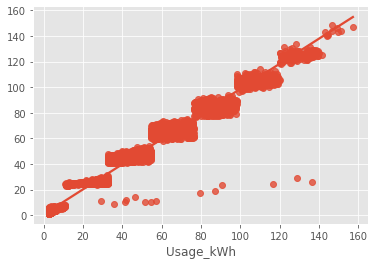

In [30]:
sns.regplot(y_test,predictions) ## This graph implies that the model has a good prediction

In [119]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 5.645e+04
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:03:10   Log-Likelihood:                -44725.
No. Observations:               15587   AIC:                         8.948e+04
Df Residuals:                   15571   BIC:                         8.960e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
